## RF Model Evaluation

In [142]:
"all_species_py_5n_100t.bin"
"all_species_py_5n_500t.bin"


"all_species_subset_feats.bin"
"all_species_subset_feats_py_1n_500t.bin"
"all_species_subset_feats_py_5n_100t.bin"
"all_species_subset_feats_py_5n_200t.bin"

'all_species_subset_feats_py_5n_200t.bin'

In [143]:
model_name = "all_species_subset_year_py_1n_500t.bin"

In [144]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import joblib
import pandas as pd

In [145]:

#defining directories
dir_path = Path.cwd().parents[1]
data_folder = dir_path.joinpath("data/models")
model_path = data_folder.joinpath(model_name)

In [146]:
# reading the model
with open(model_path, 'rb') as file:
    loaded_rf = joblib.load(file)

### Parameters

In [147]:
loaded_rf.get_params(deep=True)

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

### Feature Names

In [148]:
feature_names = loaded_rf.feature_names_in_
feature_names

array(['vv_Descendingsummer', 'vv_Descendingwinter',
       'vh_Descendingsummer', 'vh_Descendingwinter', 'vv_Ascendingsummer',
       'vv_Ascendingwinter', 'vh_Ascendingsummer', 'vh_Ascendingwinter',
       'VV_VH_Asummer', 'VV_VH_Awinter', 'VV_VH_Dsummer', 'VV_VH_Dwinter',
       'VH_VV_Asummer', 'VH_VV_Awinter', 'VH_VV_Dsummer', 'VH_VV_Dwinter',
       'SAR_NDVI_Asummer', 'SAR_NDVI_Awinter', 'SAR_NDVI_Dsummer',
       'SAR_NDVI_Dwinter', 'DVI_Asummer', 'DVI_Awinter', 'DVI_Dsummer',
       'DVI_Dwinter', 'SVI_Asummer', 'SVI_Awinter', 'SVI_Dsummer',
       'SVI_Dwinter', 'RDVI_Asummer', 'RDVI_Awinter', 'RDVI_Dsummer',
       'RDVI_Dwinter', 'NRDVI_Asummer', 'NRDVI_Awinter', 'NRDVI_Dsummer',
       'NRDVI_Dwinter', 'SSDVI_Asummer', 'SSDVI_Awinter', 'SSDVI_Dsummer',
       'SSDVI_Dwinter', 'B11summer', 'B11winter', 'B02summer',
       'B02winter', 'B12summer', 'B12winter', 'B08summer', 'B08winter',
       'B04summer', 'B04winter', 'B03summer', 'B03winter', 'NDVIsummer',
       'NDVIwint

### Feature Importance

In [149]:
figsize=(12, 6)
importances = loaded_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in loaded_rf.estimators_], axis=0)


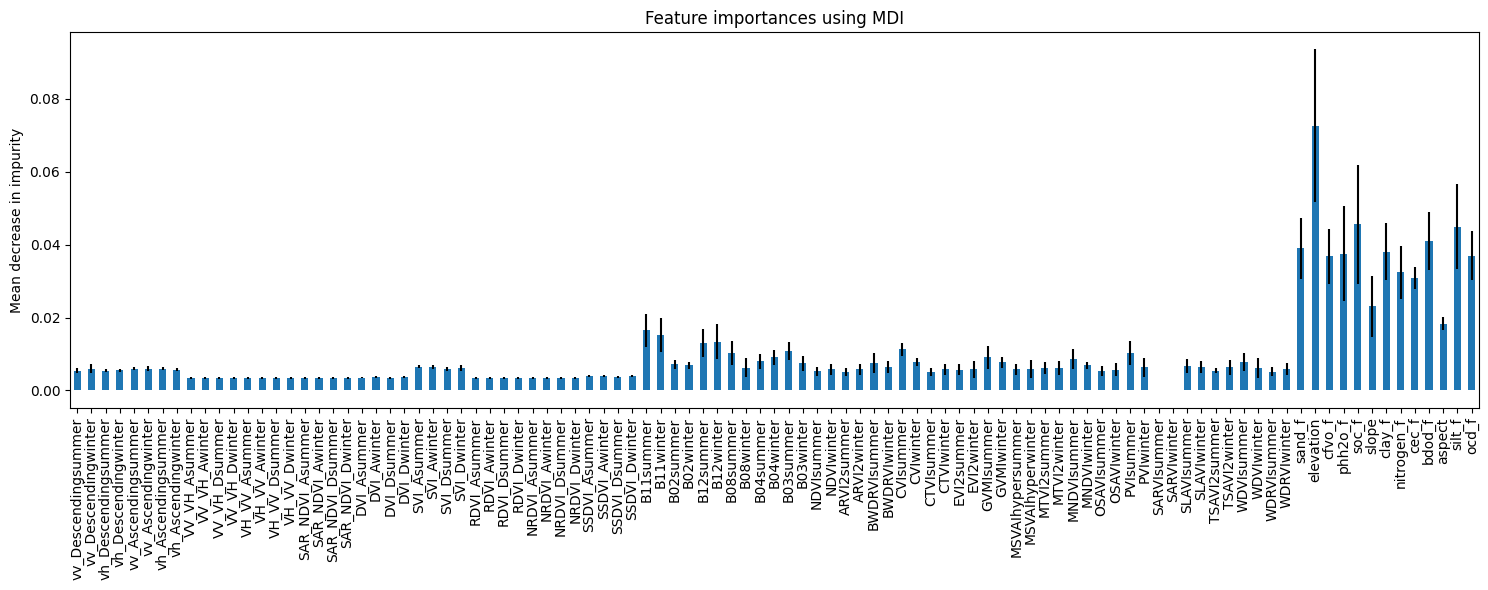

In [150]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [151]:
round(forest_importances.sort_values(ascending=False), 4)[0:50]
# round(forest_importances[forest_importances>0.01], 4).index



elevation              0.0725
soc_f                  0.0456
silt_f                 0.0449
bdod_f                 0.0410
sand_f                 0.0390
clay_f                 0.0381
phh2o_f                0.0375
ocd_f                  0.0369
cfvo_f                 0.0368
nitrogen_f             0.0324
cec_f                  0.0308
slope                  0.0231
aspect                 0.0183
B11summer              0.0165
B11winter              0.0152
B12winter              0.0133
B12summer              0.0131
CVIsummer              0.0112
B03summer              0.0108
PVIsummer              0.0103
B08summer              0.0102
GVMIsummer             0.0091
B04winter              0.0090
MNDVIsummer            0.0086
B04summer              0.0080
CVIwinter              0.0077
WDVIsummer             0.0077
GVMIwinter             0.0077
BWDRVIsummer           0.0076
B03winter              0.0074
B02summer              0.0071
B02winter              0.0069
MNDVIwinter            0.0069
SLAVIsumme